<a href="https://colab.research.google.com/github/RisalahNaufal/DATA-MINING_Hirarki-Klaster-Pada-Dataset-Customer-Cluster/blob/main/Hirarki_Klaster_008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches

from matplotlib.patches import Rectangle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 600
sns.set(rc = {'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'

In [ ]:
df = pd.read_csv('Customers Cluster.csv')
df.head()

,ID,Gender,Age,Income,Spending
0,1,Female,47,600240,0.16
1,2,Male,60,150060,0.04
2,3,Male,63,240096,0.51
3,4,Male,48,270108,0.46
4,5,Female,35,105042,0.35


In [ ]:
df = df.drop(['ID'], axis=1)
df.head(10)

,Gender,Age,Income,Spending
0,Female,47,600240,0.16
1,Male,60,150060,0.04
2,Male,63,240096,0.51
3,Male,48,270108,0.46
4,Female,35,105042,0.35
5,Male,68,315126,0.43
6,Female,46,125050,0.05
7,Female,38,565226,0.91
8,Male,19,370148,0.10
9,Female,35,370148,0.72


In [ ]:
df['Gender'] = df['Gender'].replace({"Female":0,"Male":1})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    200 non-null    int64  
 1   Age       200 non-null    int64  
 2   Income    200 non-null    int64  
 3   Spending  200 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [ ]:
df.head(15)

,Gender,Age,Income,Spending
0,0,47,600240,0.16
1,1,60,150060,0.04
2,1,63,240096,0.51
3,1,48,270108,0.46
4,0,35,105042,0.35
5,1,68,315126,0.43
6,0,46,125050,0.05
7,0,38,565226,0.91
8,1,19,370148,0.10
9,0,35,370148,0.72


In [ ]:
df.isnull().sum()

Gender      0
Age         0
Income      0
Spending    0
dtype: int64

In [ ]:
df = pd.DataFrame(df)

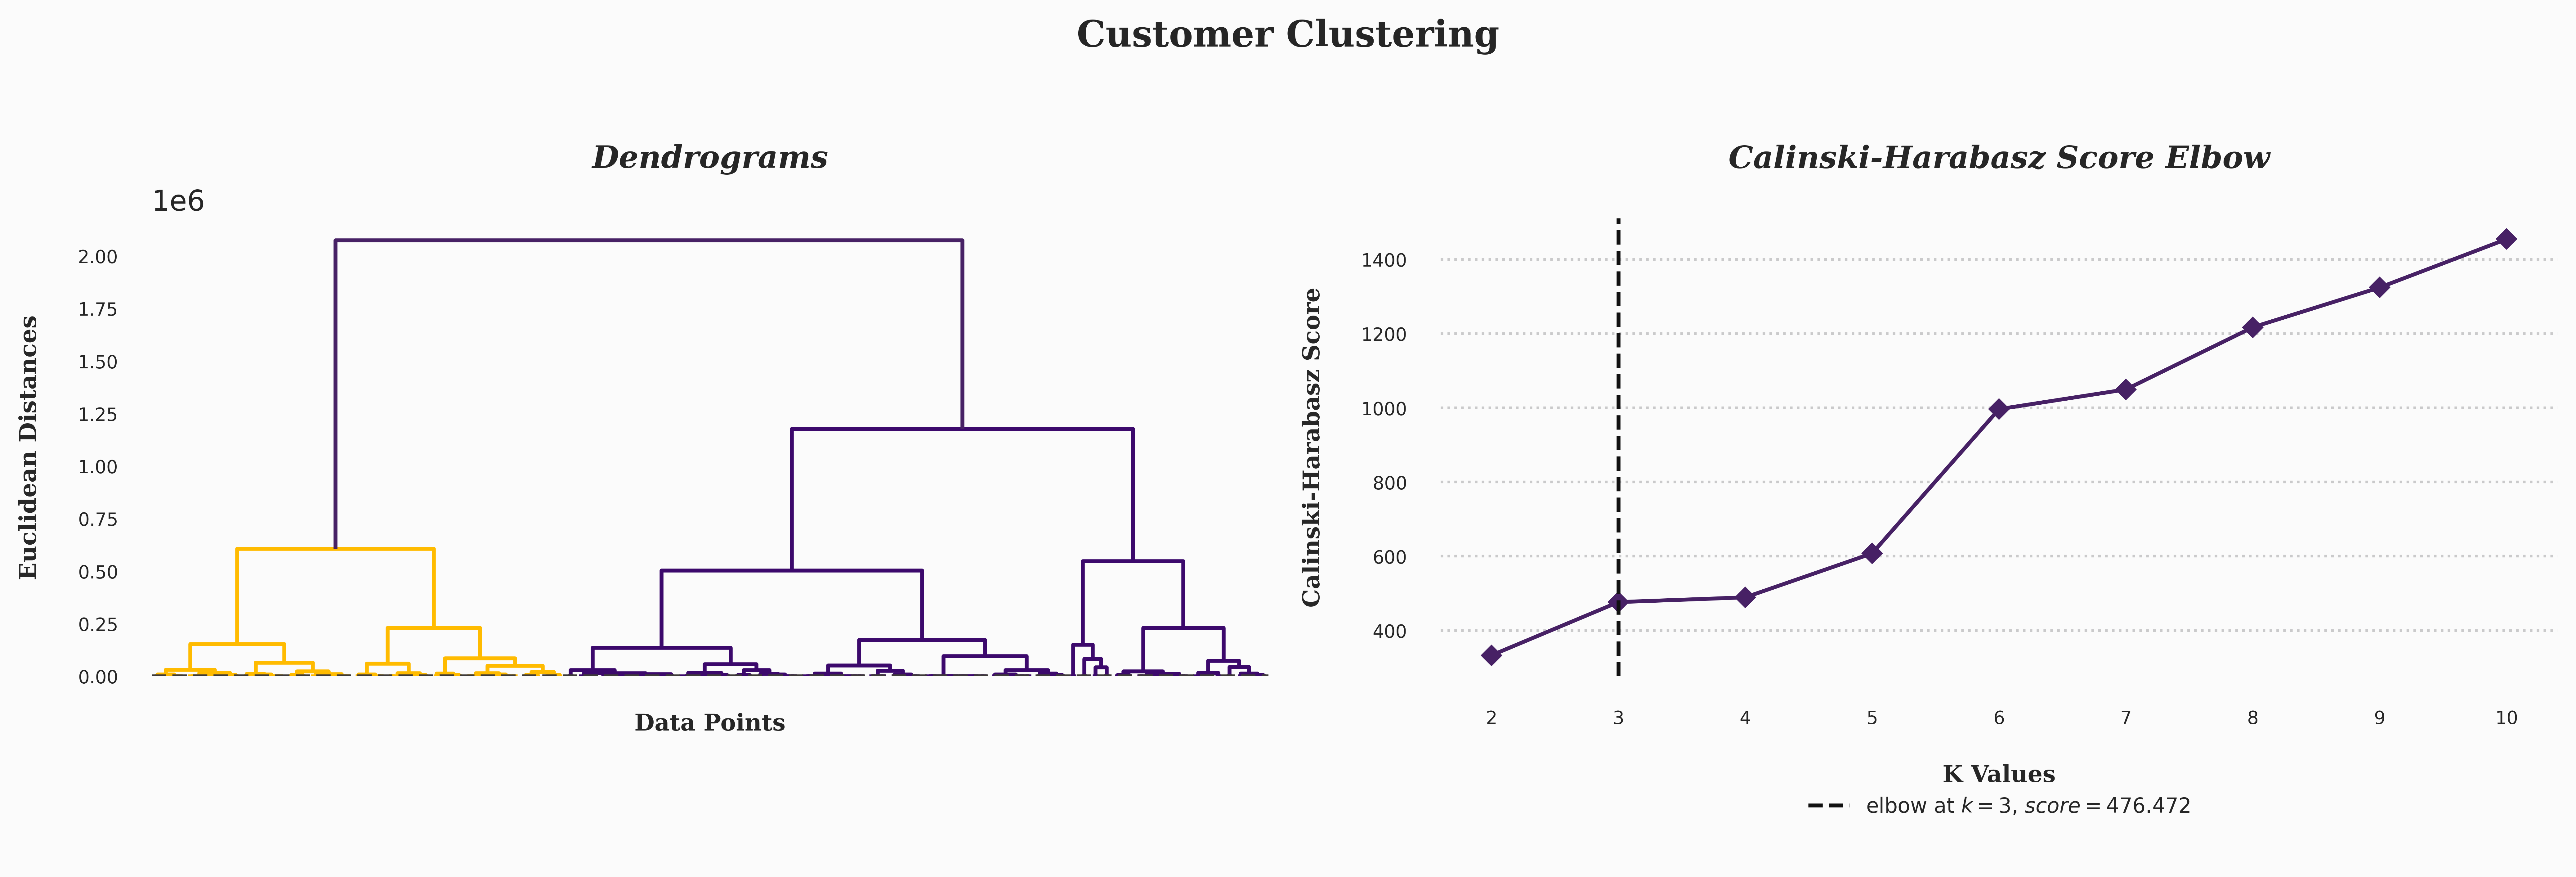

In [ ]:
    # --- Define Dendrogram ---
def agg_dendrogram():

    # --- Figure Settings ---
      color_palette=['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
      set_palette(color_palette)
      text_style=dict(fontweight='bold', fontfamily='serif')
      ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
      title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
      bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
      fig=plt.figure(figsize=(14, 5))

        # --- Dendrogram Plot ---
      ax1=fig.add_subplot(1, 2, 1)
      dend=shc.dendrogram(shc.linkage(df, method='ward', metric='euclidean'))
      plt.axhline(y=115, color='#3E3B39', linestyle='--')
      plt.xlabel('\nData Points', fontsize=9, **text_style)
      plt.ylabel('Euclidean Distances\n', fontsize=9, **text_style)
      plt.annotate('Horizontal Cut Line', xy=(15000, 130), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
      plt.tick_params(labelbottom=False)
      for spine in ax1.spines.values():
            spine.set_color('None')
      plt.grid(axis='both', alpha=0)
      plt.tick_params(labelsize=7)
      plt.title('Dendrograms\n', **title)

        # --- Elbow Score (Calinski-Harabasz Index) ---
      ax2=fig.add_subplot(1, 2, 2)
      elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False, ax=ax2)
      elbow_score_ch.fit(df)
      elbow_score_ch.finalize()
      elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
      elbow_score_ch.ax.tick_params(labelsize=7)
      for text in elbow_score_ch.ax.legend_.texts:
            text.set_fontsize(9)
      for spine in elbow_score_ch.ax.spines.values():
            spine.set_color('None')
      elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
      elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
      elbow_score_ch.ax.grid(axis='x', alpha=0)
      elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
      elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

      plt.suptitle('Customer Clustering\n', fontsize=14, **text_style)
      plt.tight_layout()
      plt.show();

# --- Calling Dendrogram Functions ---
agg_dendrogram();

In [ ]:
print(silhouette_score(df, AgglomerativeClustering(n_clusters=n_cluster).fit_predict(df)))


0.5630723309336517


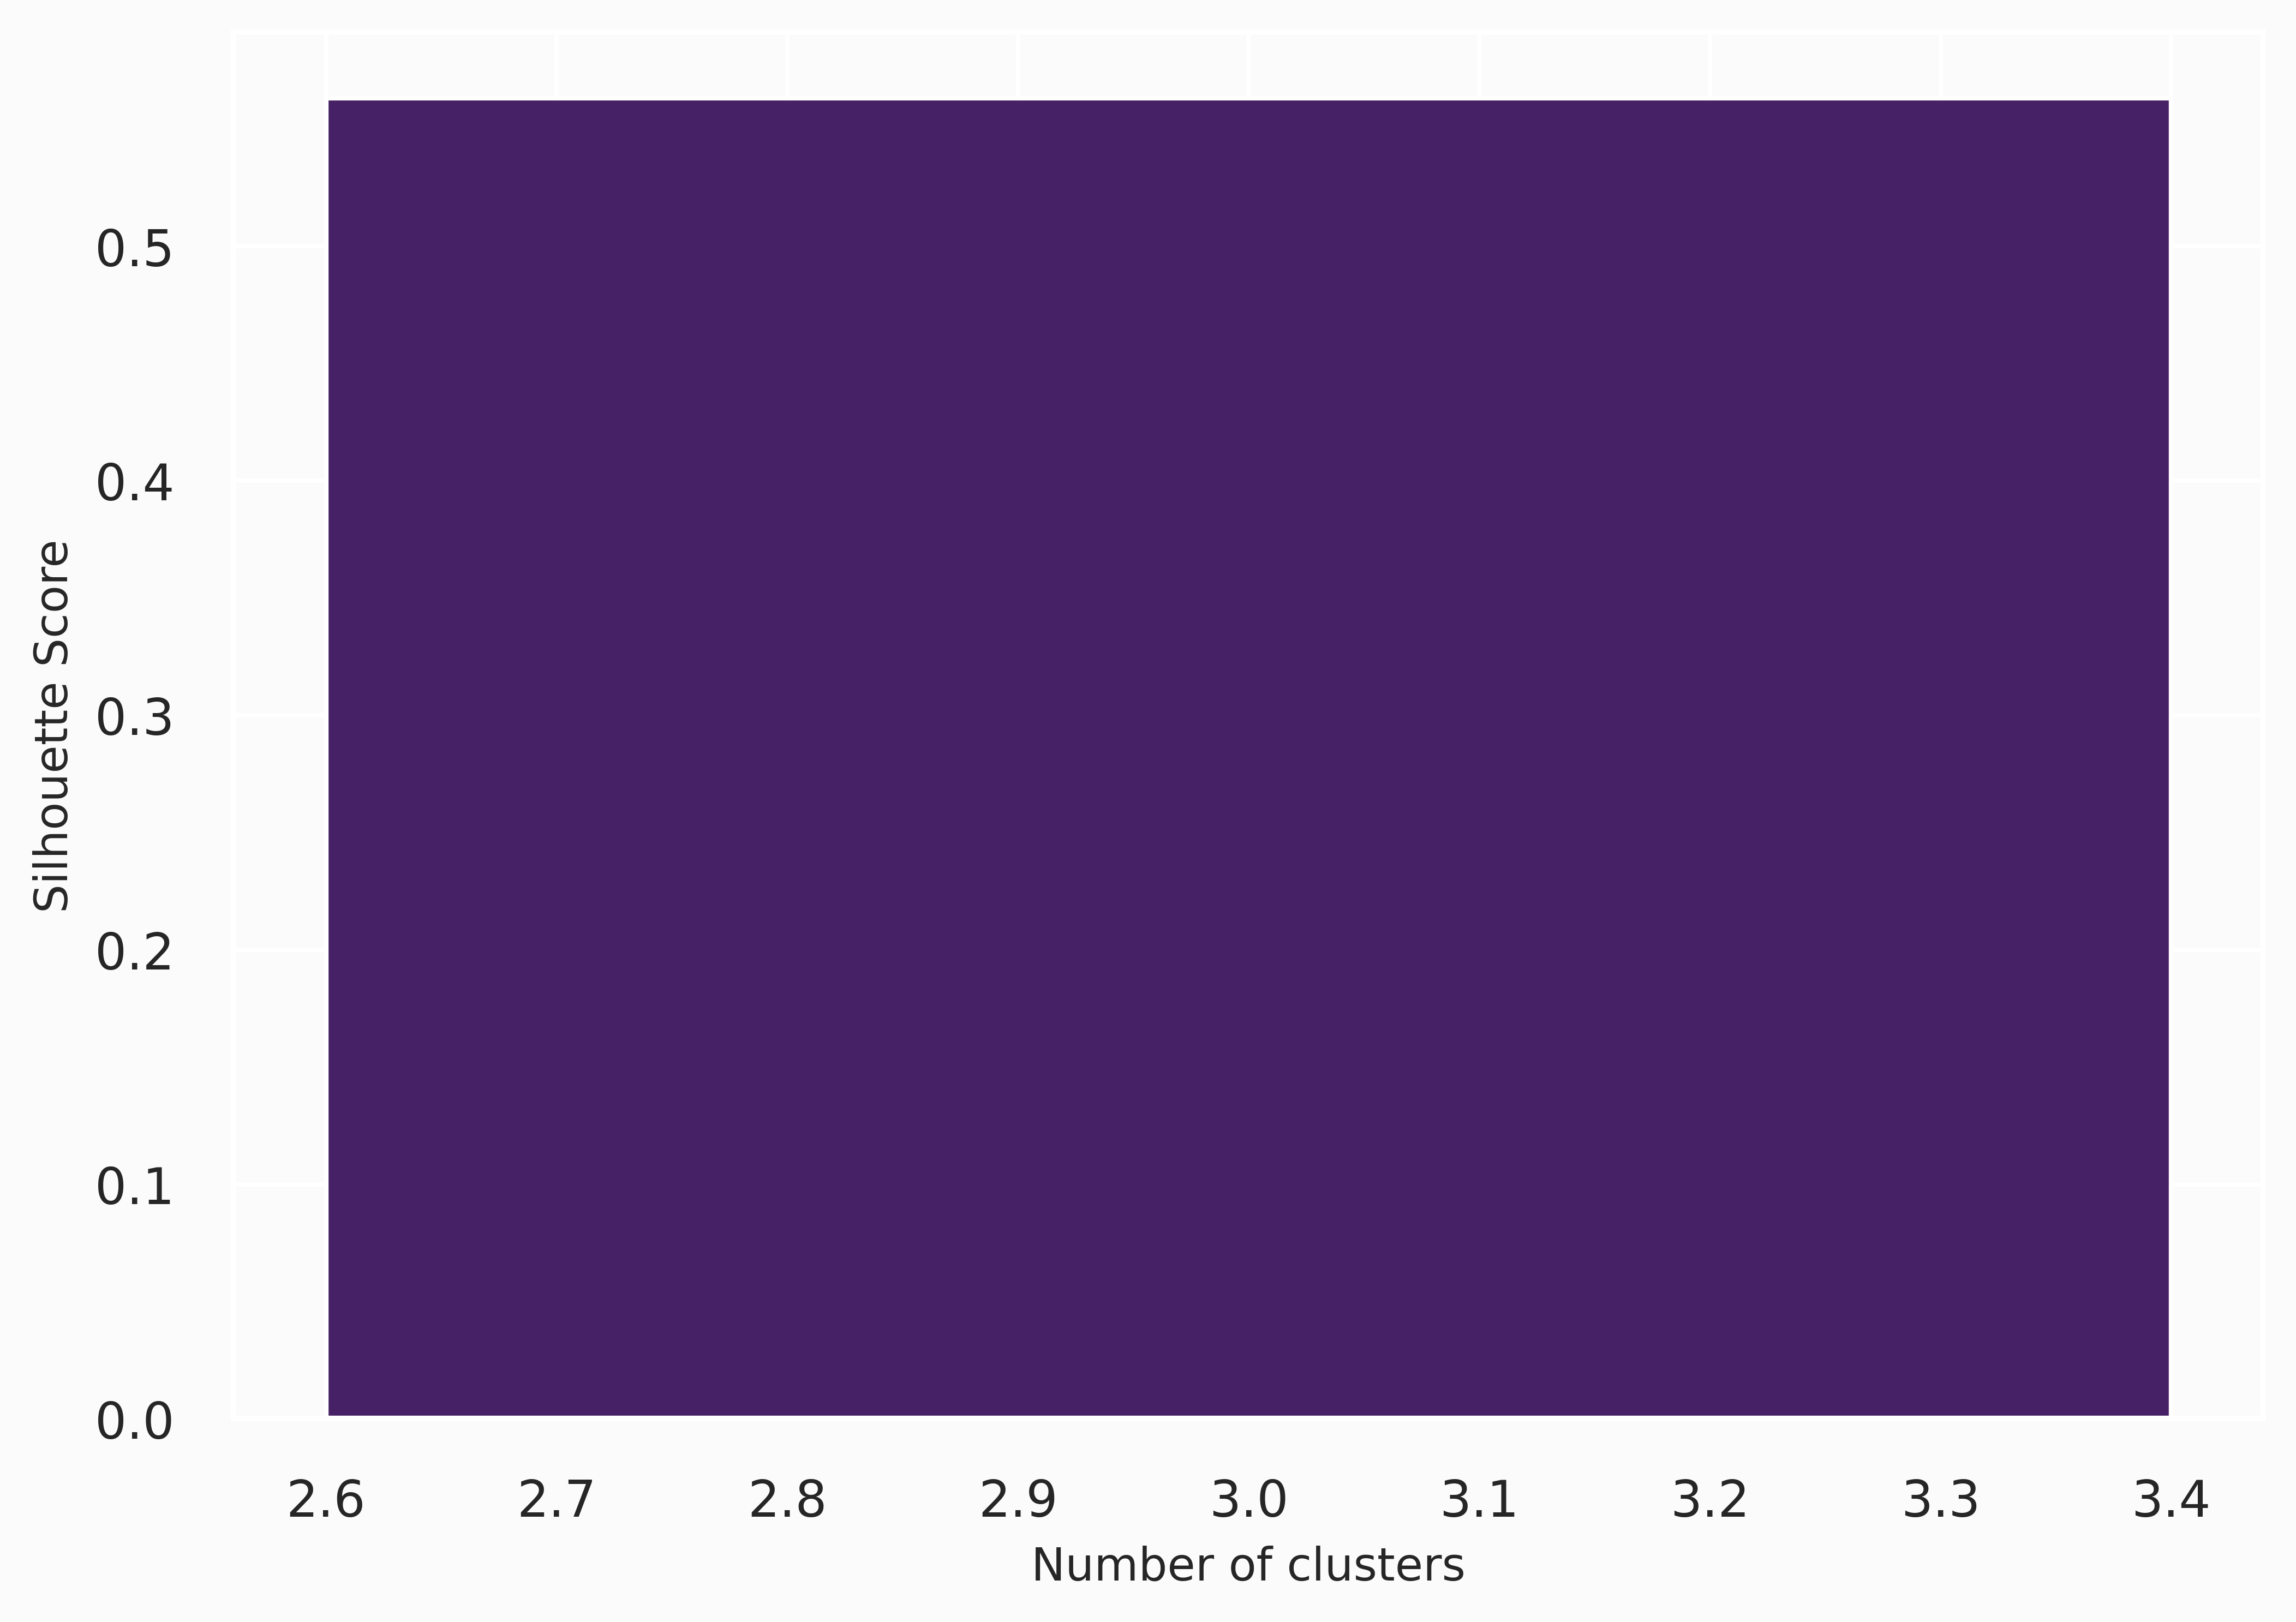

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd  # Make sure to import pandas if it's not imported

# Assuming 'df' is your data frame

silhouette_scores = []

n_cluster = 3  # Set the number of clusters to 3




plt.bar([n_cluster], silhouette_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.show()

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(df)
labels = agglo.labels_
hasil_agglo = pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo.head()

,Gender,Age,Income,Spending,cluster
0,0,47,600240,0.16,1
1,1,60,150060,0.04,0
2,1,63,240096,0.51,0
3,1,48,270108,0.46,2
4,0,35,105042,0.35,0


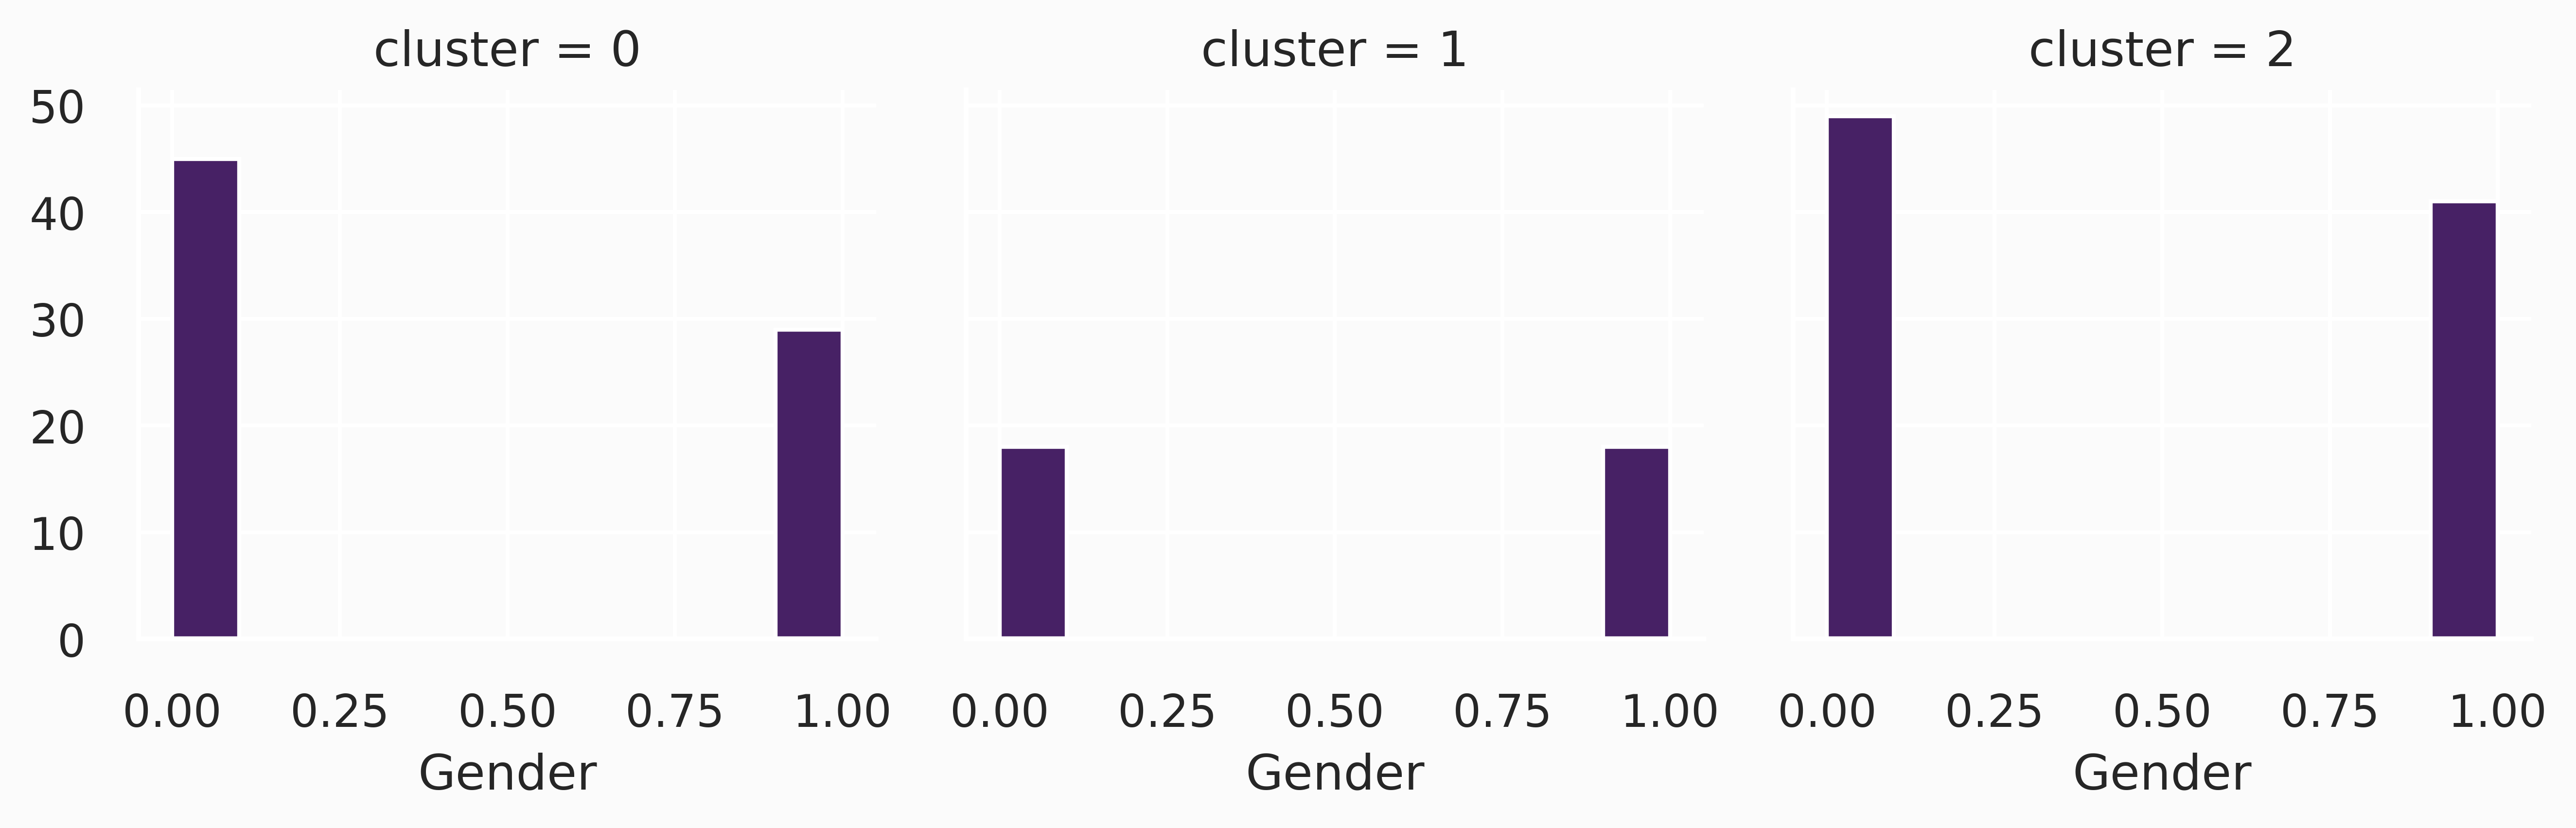

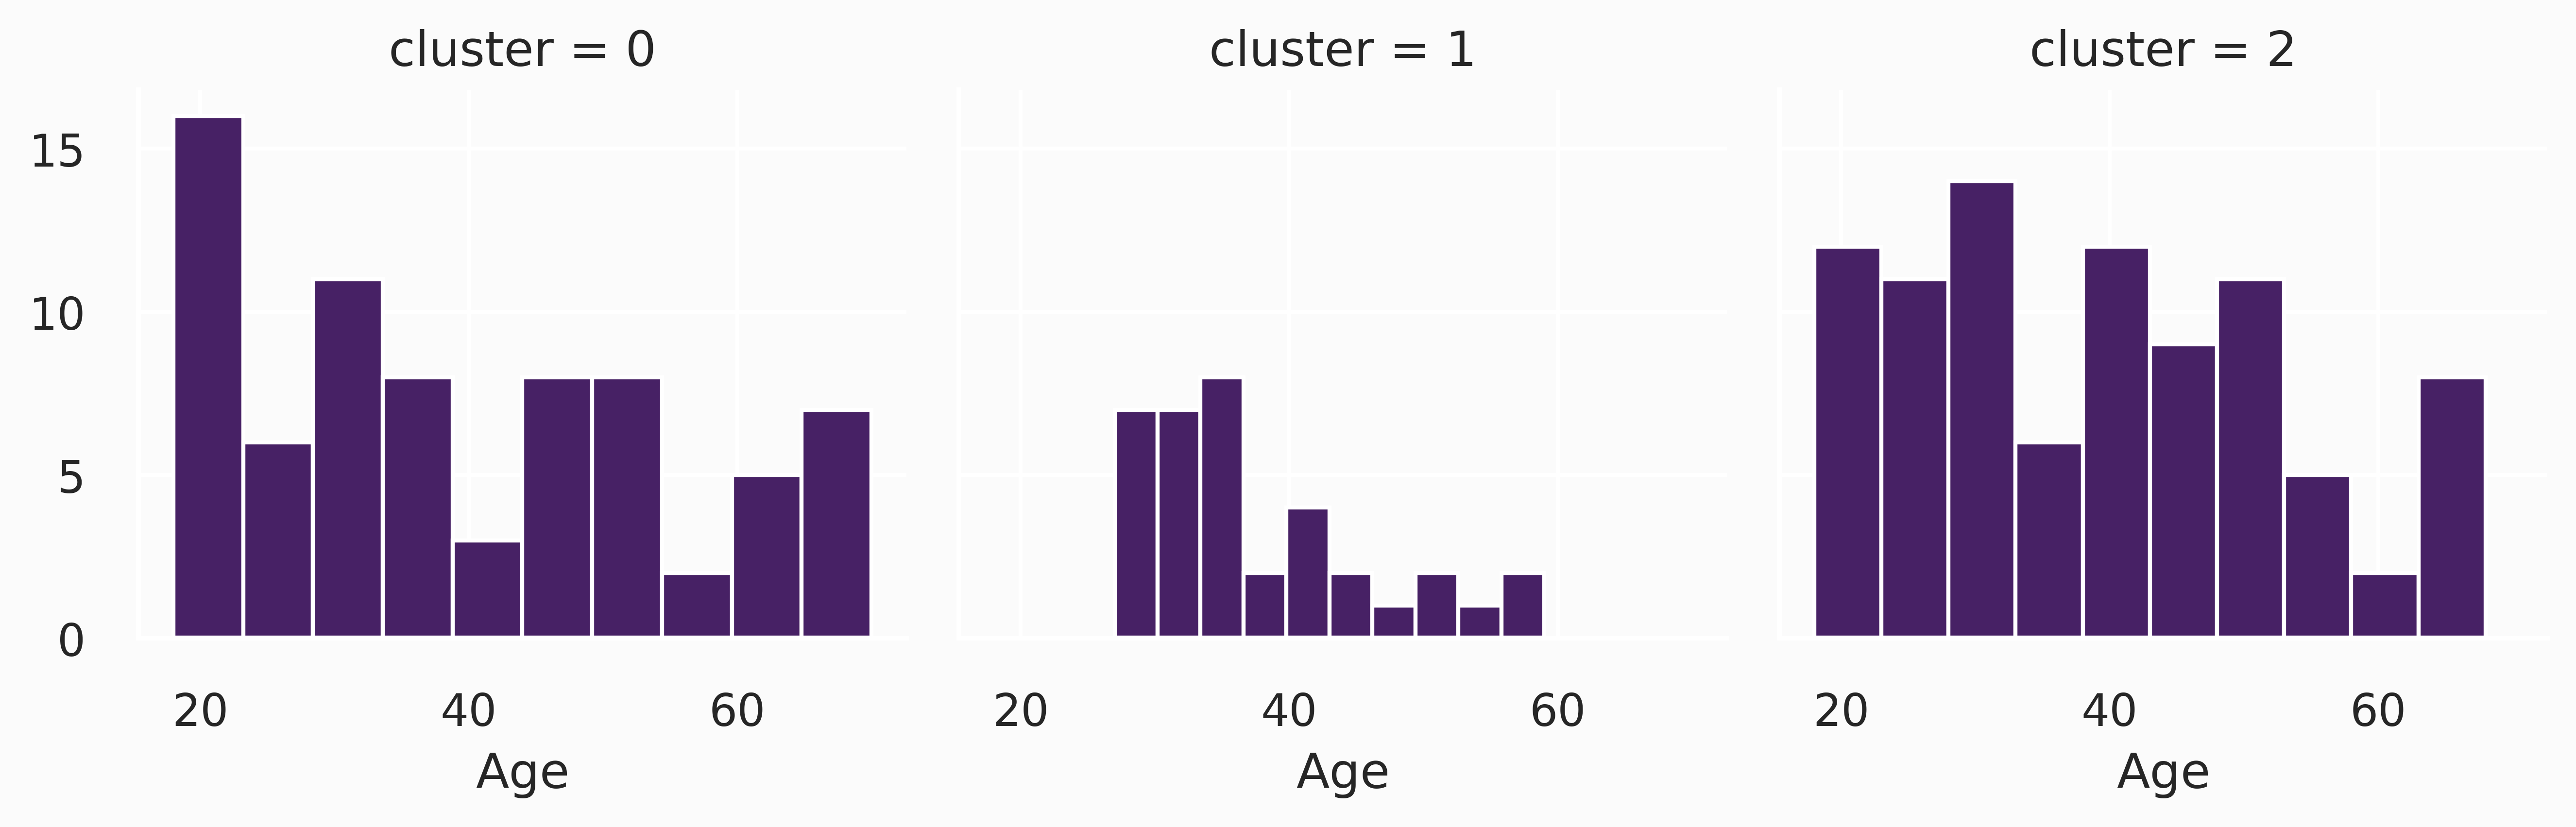

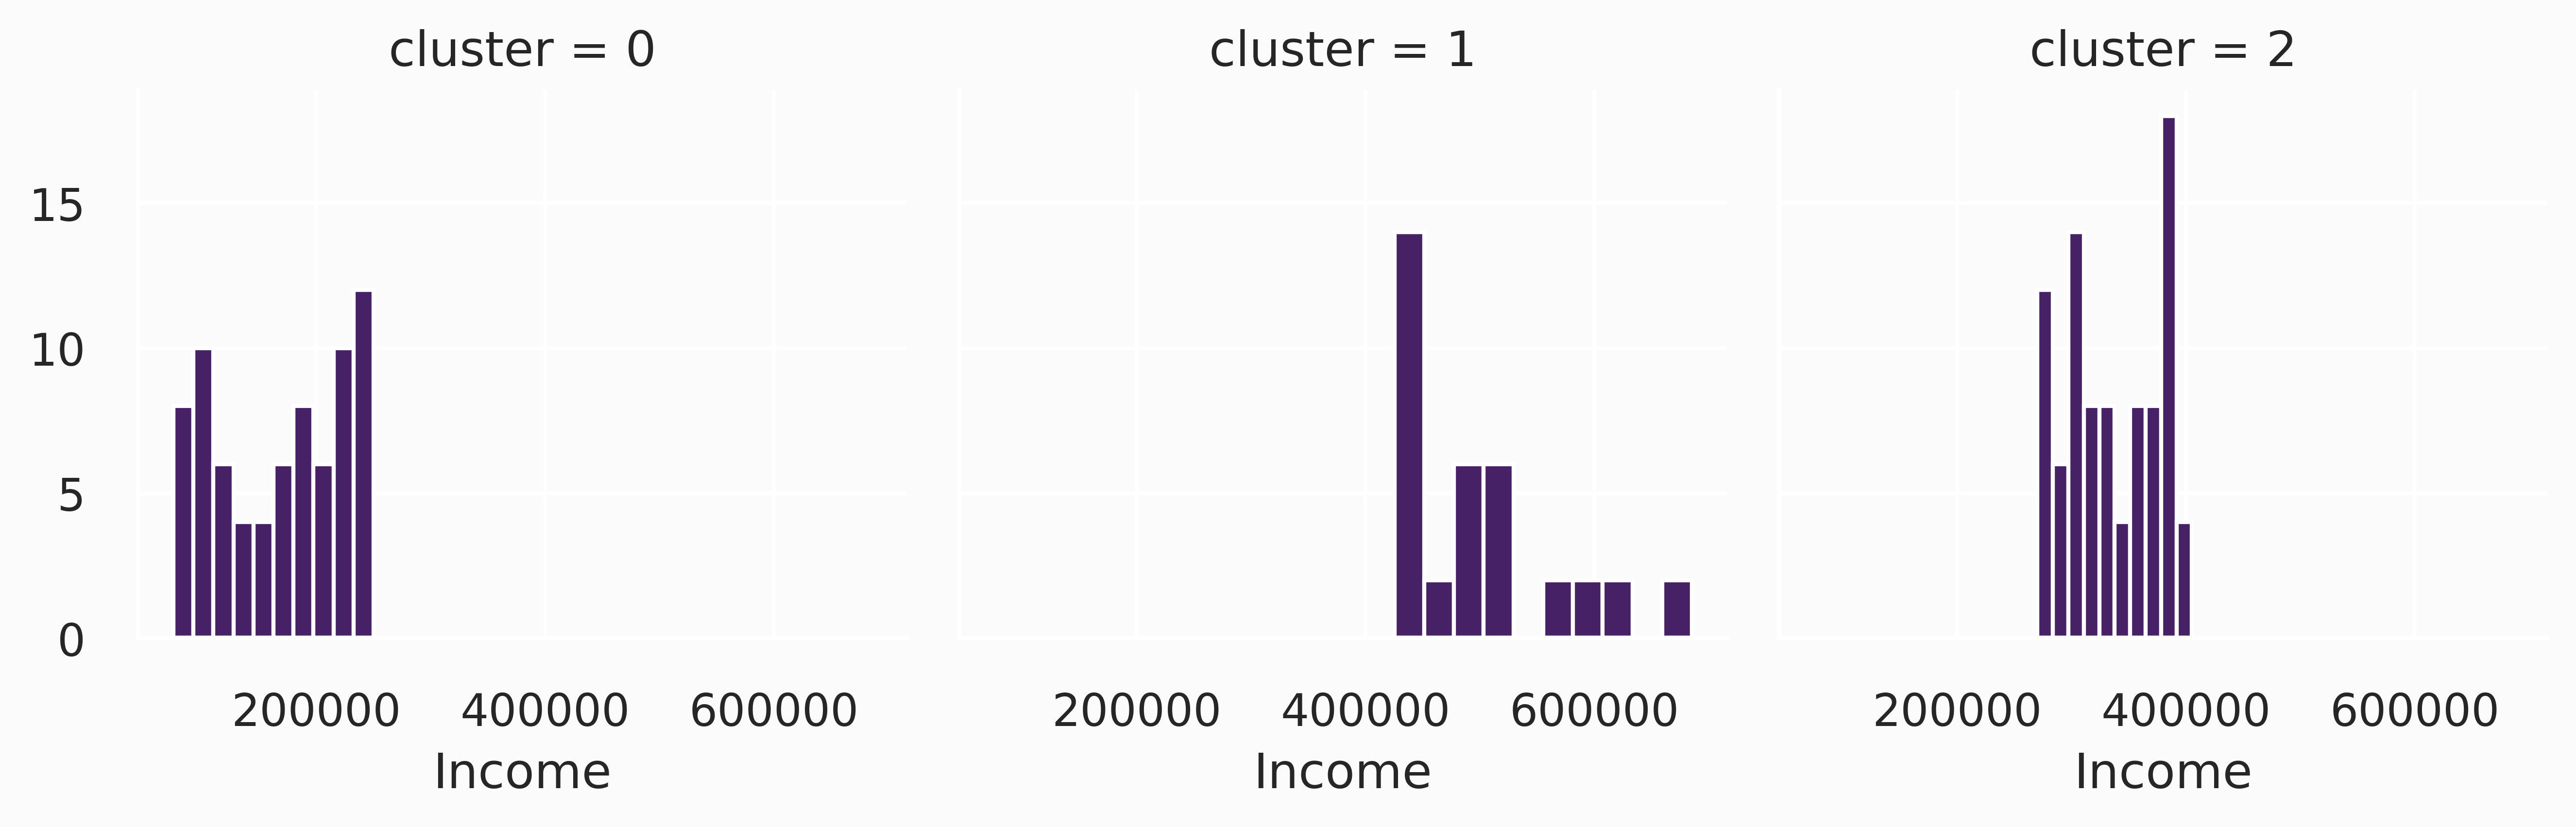

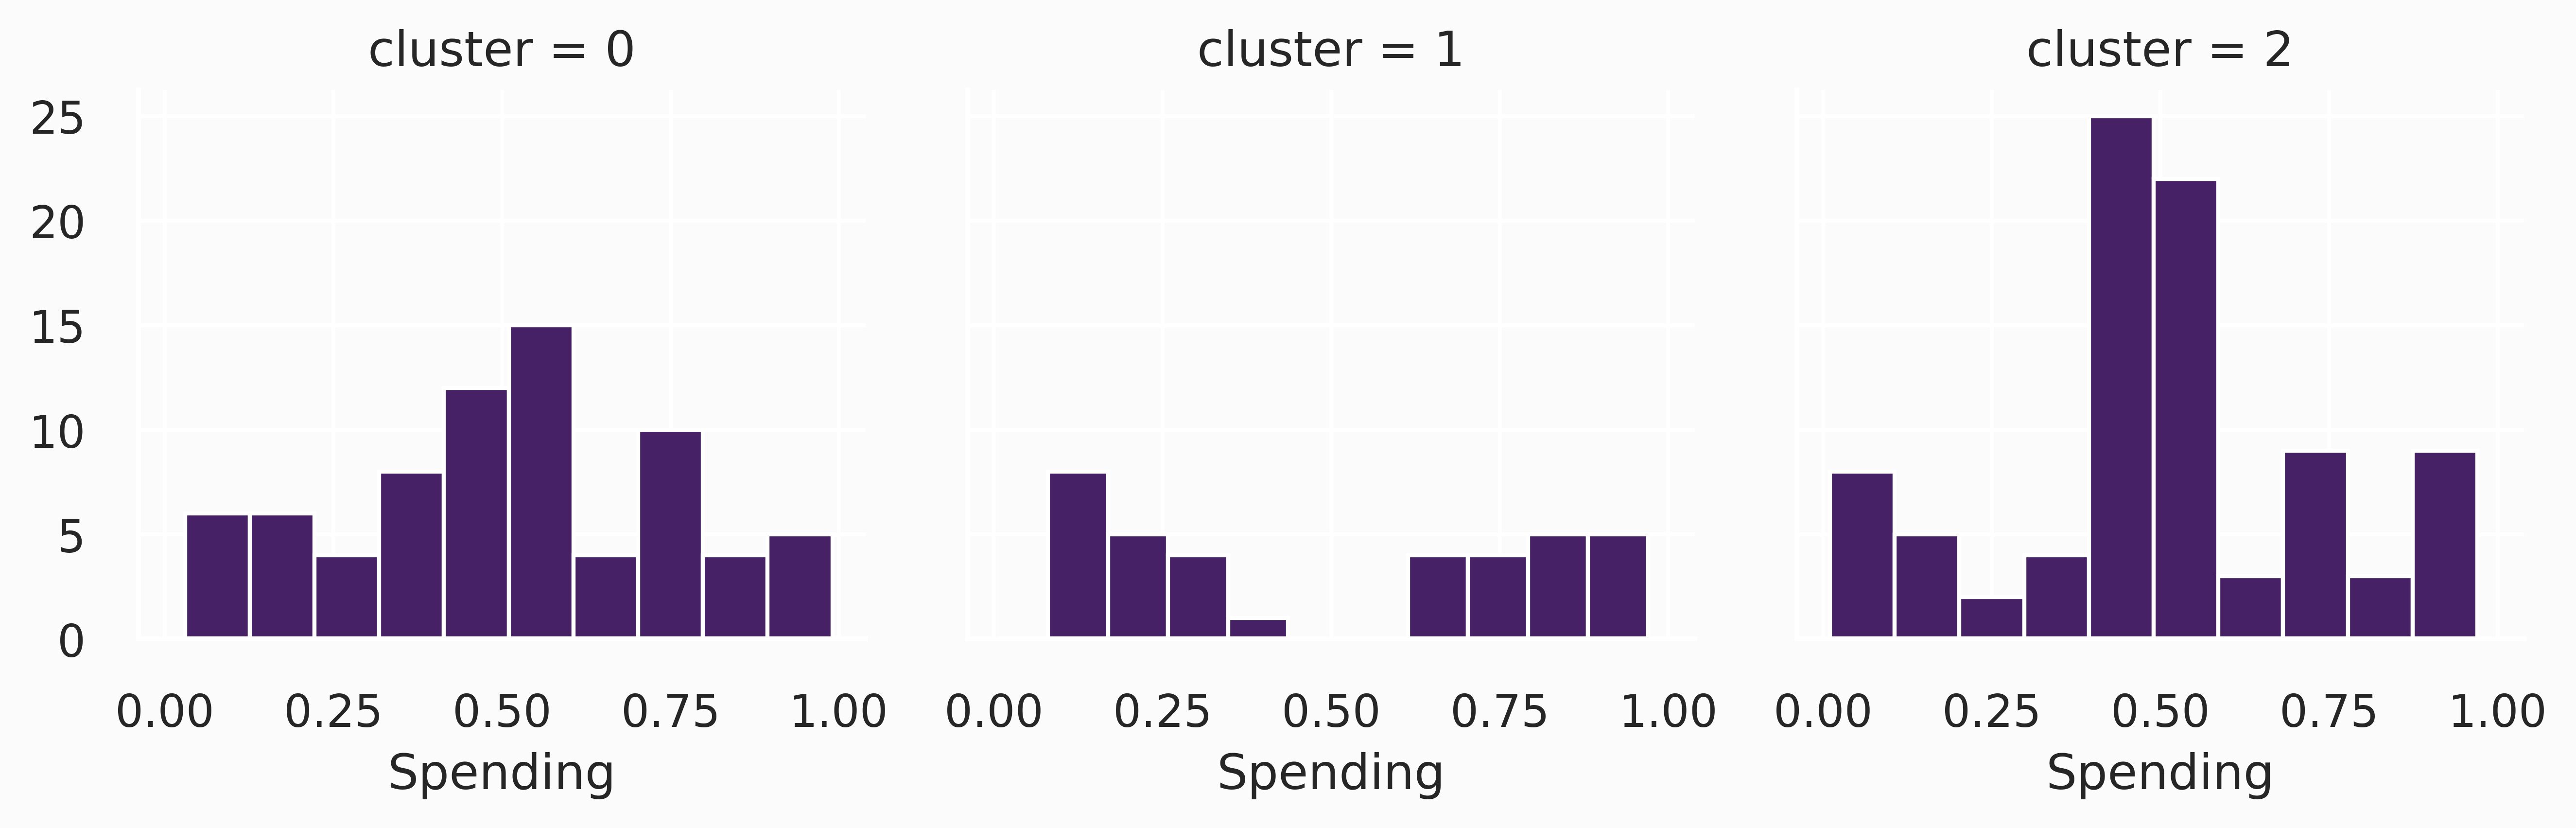

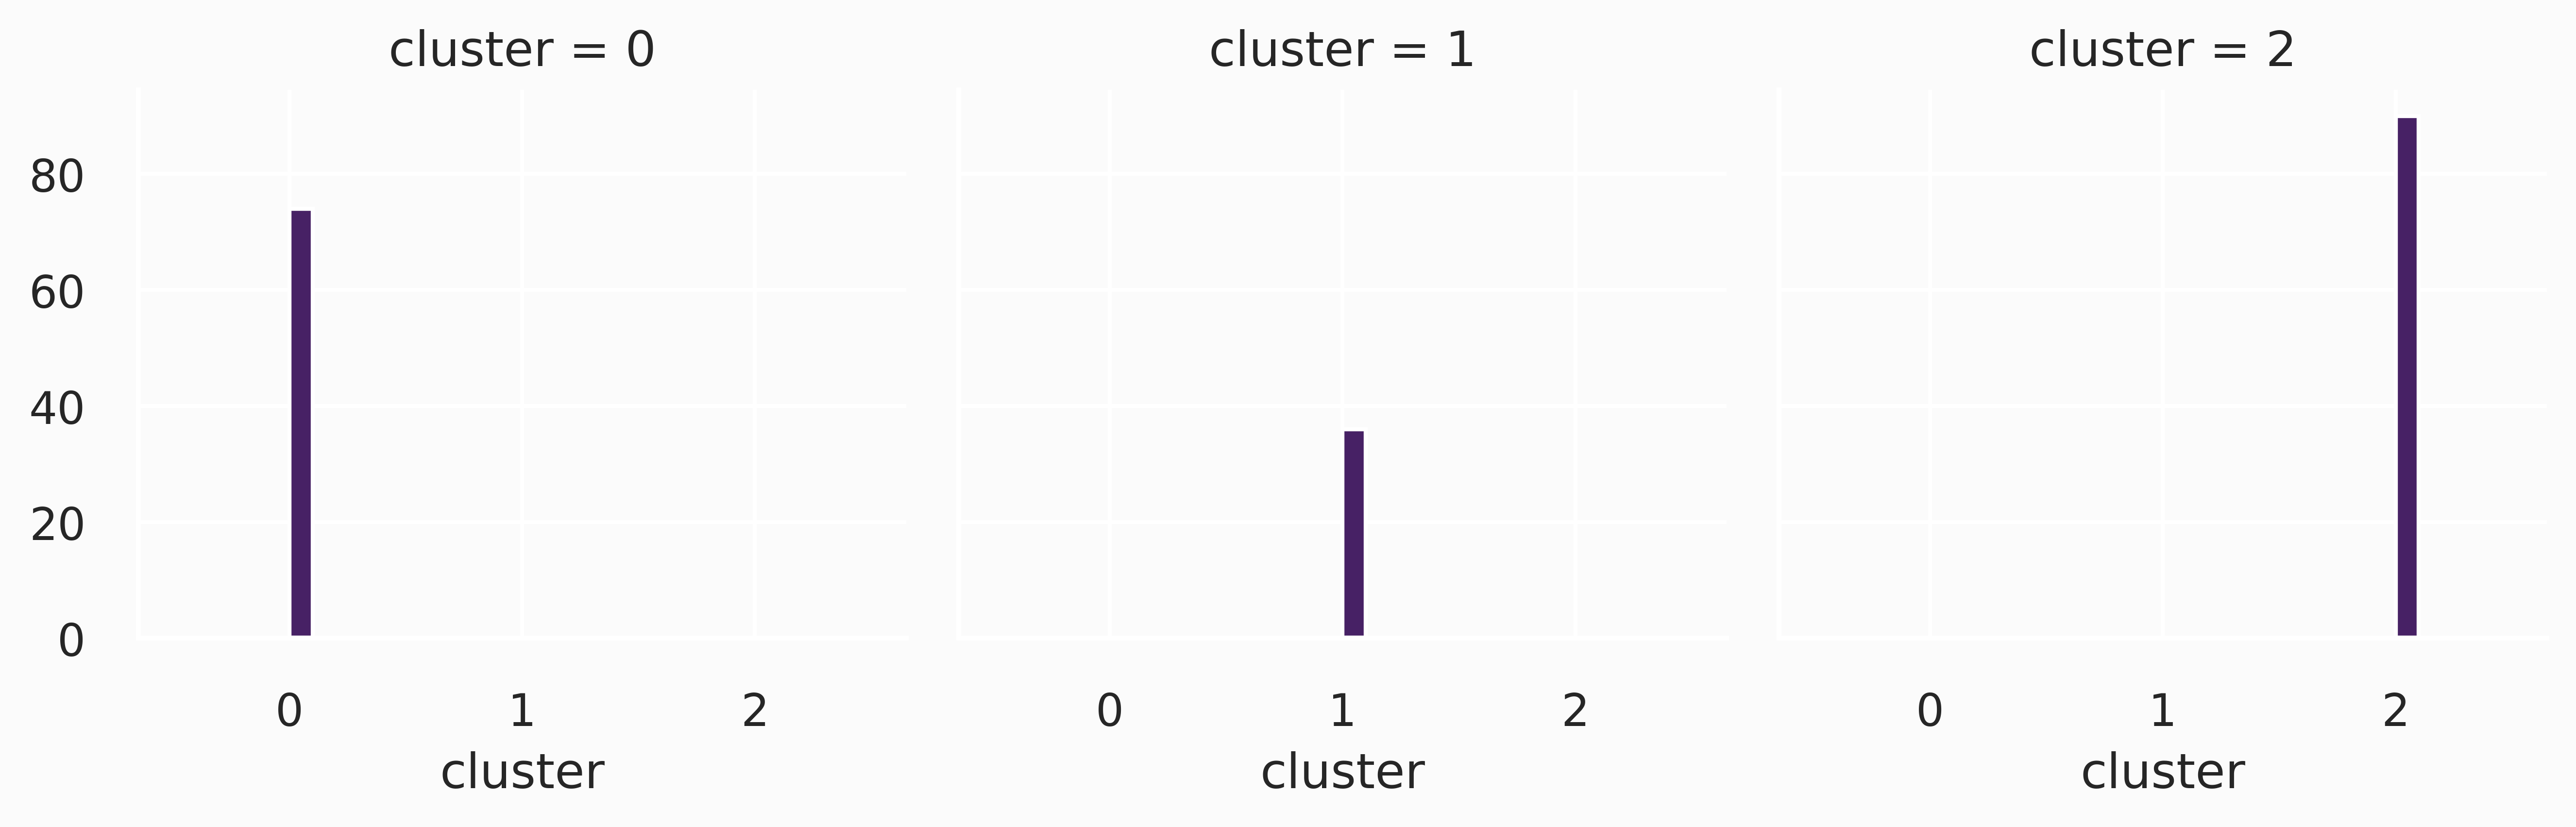

In [ ]:
for i in hasil_agglo:
  grid = sns.FacetGrid(hasil_agglo, col='cluster')
  grid.map(plt.hist,i)

In [ ]:
# --- Transform into Array ---
df = np.asarray(df)

# --- Applying PCA ---
pca = PCA(n_components=2, random_state=24)
df = pca.fit_transform(df)

In [ ]:
x, y = df[:, 0], df[:, 1]

warna = {0: 'red',
         1: 'blue',
         2: 'green'}

label_pca = {0: 'cluster 0',
             1: 'cluster 1',
             2: 'cluster 2'}
scaleddata = pd.DataFrame({'x': x, 'y': y, 'label':labels})
groups = scaleddata.groupby('label')

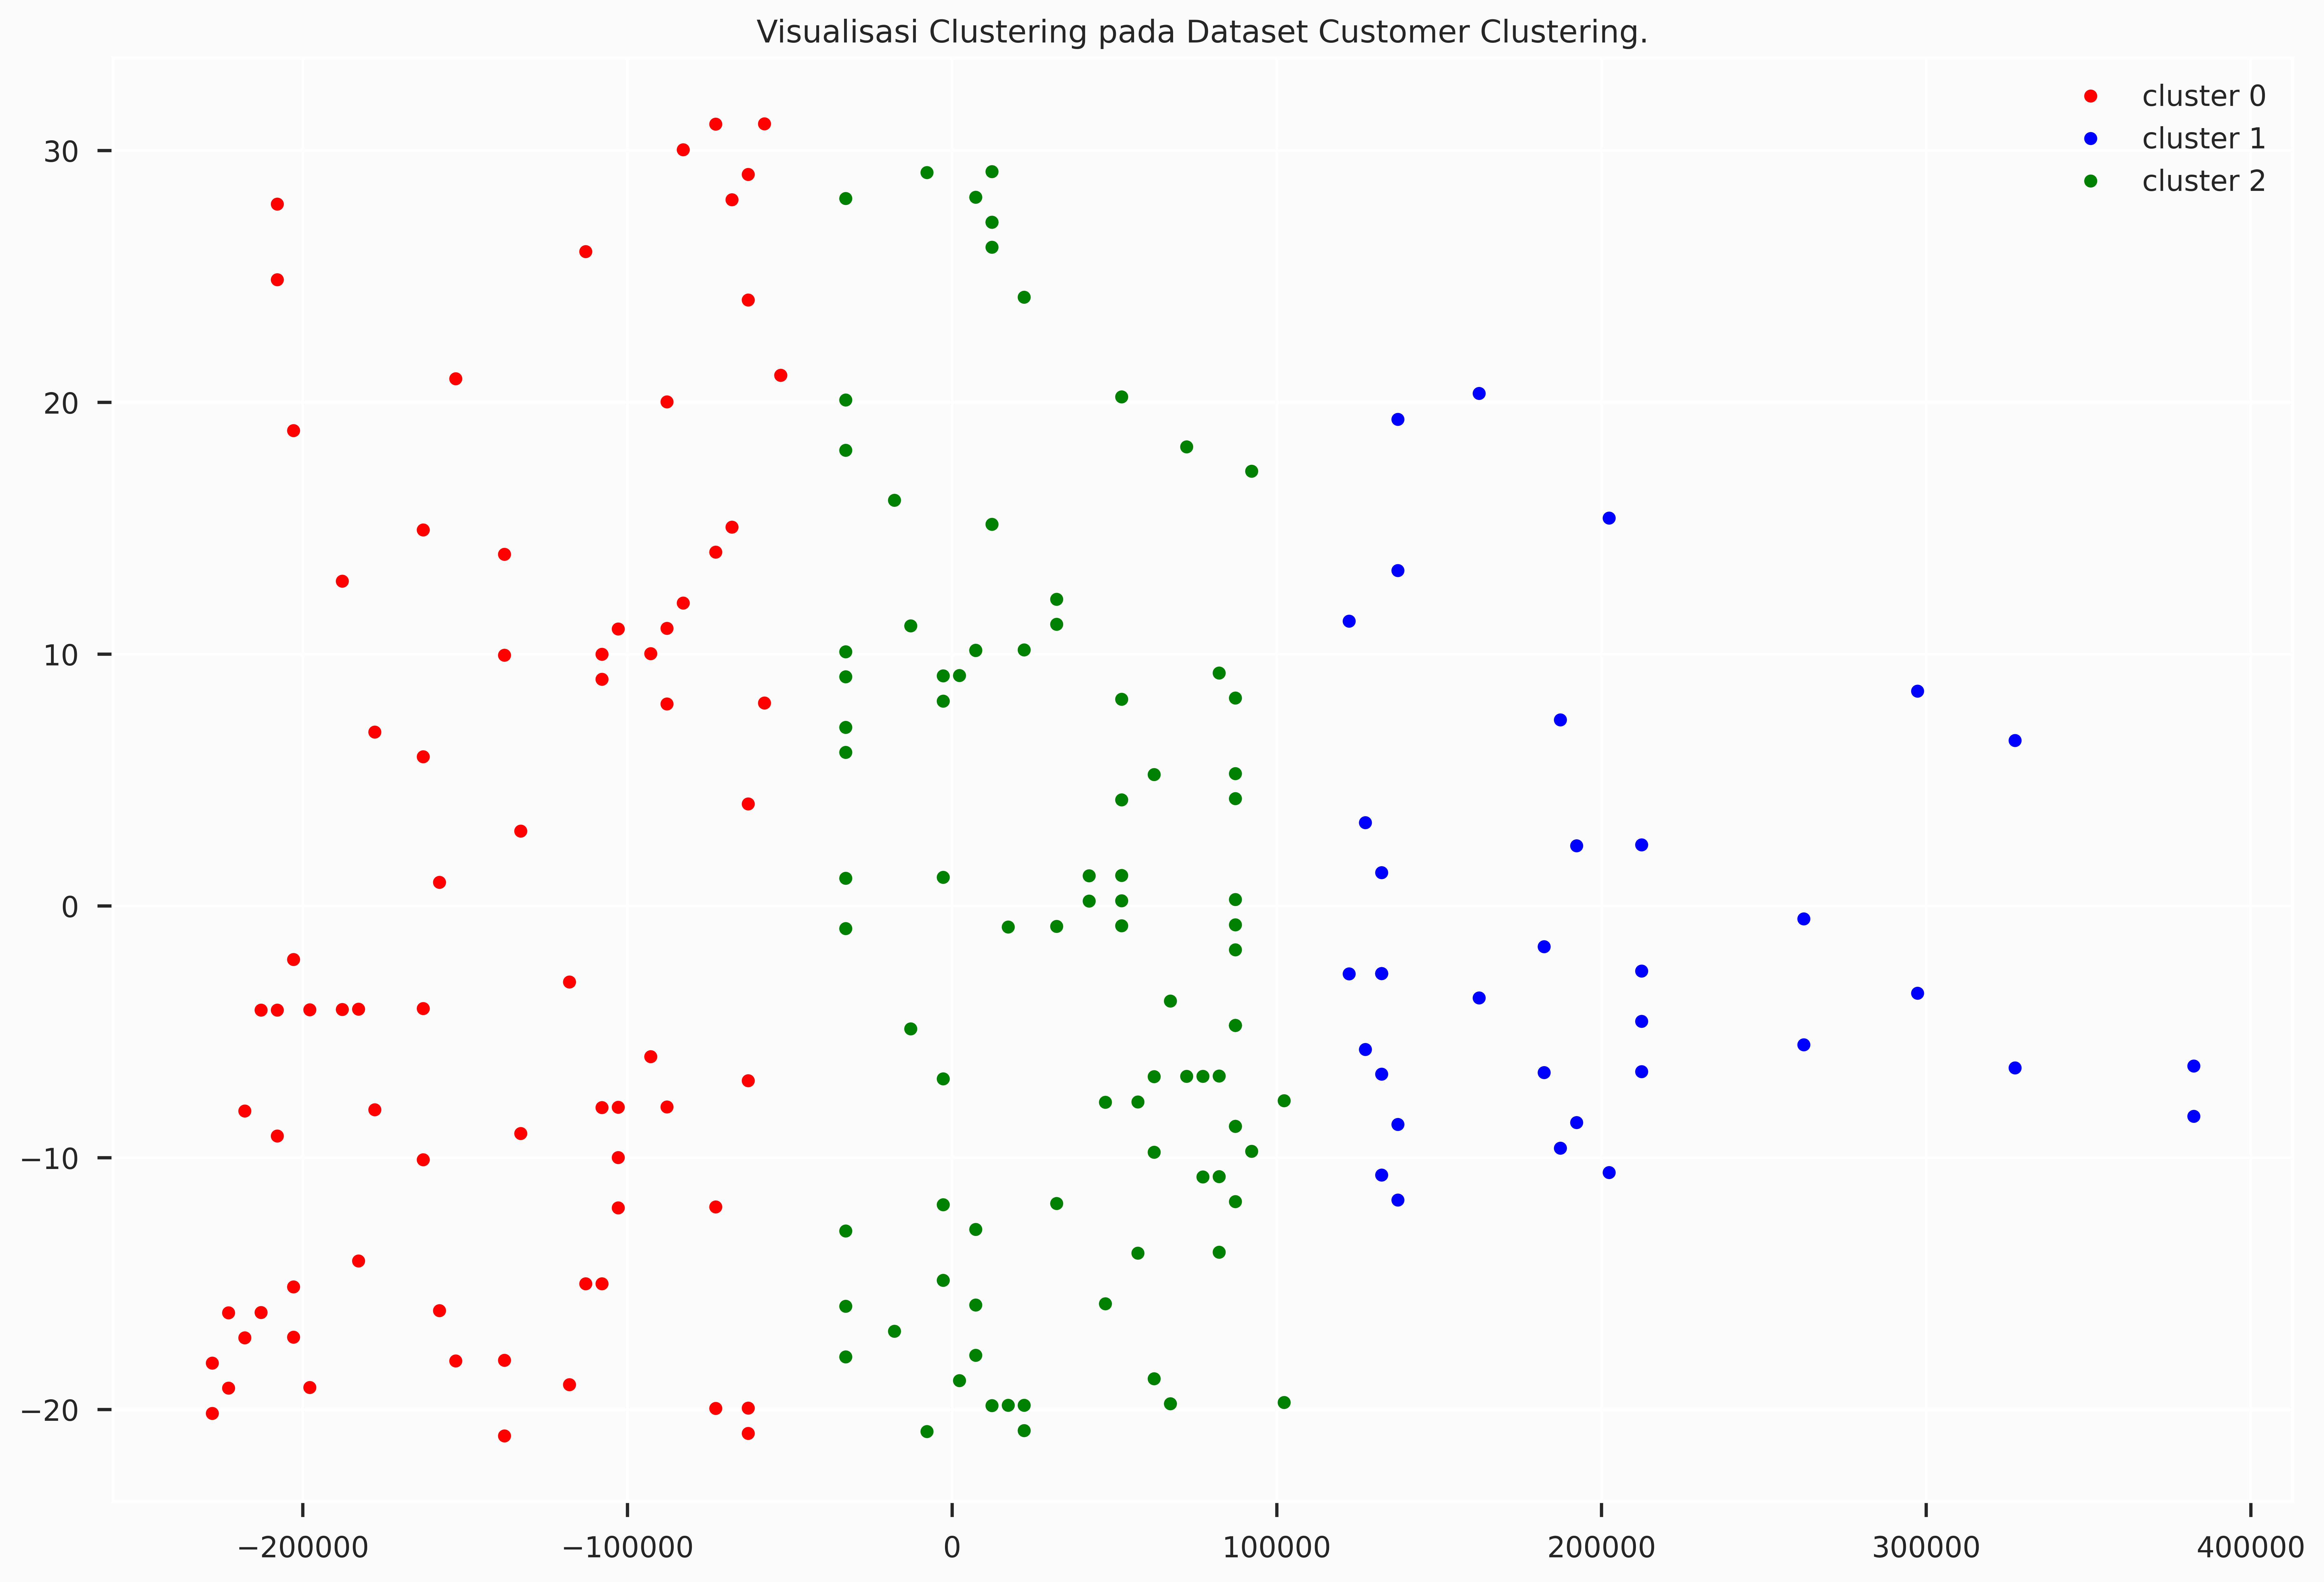

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
          color=warna[name], label=label_pca[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x', which='both', bottom='off', labelbottom='off')
  ax.tick_params(axis='y', which='both', left='off', labelleft='off')

ax.legend()
ax.set_title('Visualisasi Clustering pada Dataset Customer Clustering.')
plt.show()